# Kears iris Modeling

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

In [7]:
iris.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [6]:
iris_AR = iris.values

In [8]:
AR_X = iris_AR[:, :4].astype(float)
AR_y = iris_AR[:, 4]

AR_X.shape, AR_y.shape

((150, 4), (150,))

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
AR_yLBE = encoder.fit_transform(AR_y)

AR_yLBE

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
from tensorflow.keras.utils import to_categorical

AR_yOHE = to_categorical(AR_yLBE)

AR_yOHE

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [12]:
import tensorflow

tensorflow.__version__

'2.5.0'

In [13]:
tensorflow.keras.__version__

'2.5.0'

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_yOHE,
                                                    test_size=0.3,
                                                    random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

## Keras Modeling

In [15]:
from tensorflow.keras import models, layers

### Model Define

In [16]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation='relu', input_shape=(4,))) # 첫 번째 hidden layer의 개수=16, input의 shape 명시
Model_iris.add(layers.Dense(8, activation='relu')) # 두 번째 hidden layer의 개수=8
Model_iris.add(layers.Dense(3, activation='softmax')) # output layer의 개수=3=output의 shape, 다중분류이므로 softmax

In [17]:
Model_iris.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


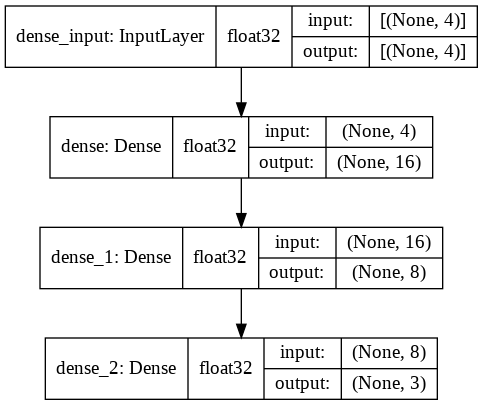

In [18]:
from tensorflow.keras import utils
utils.plot_model(Model_iris, show_shapes=True, show_dtype=True)

### Model Compile

In [19]:
Model_iris.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

### Model Fit

In [20]:
History_iris = Model_iris.fit(X_train, y_train,
                              epochs=500, # propagation 반복 횟수 (학습 횟수)
                              batch_size=7, # 105개의 train data를 7개씩 나누어서 15번 반복
                              validation_data=(X_test, y_test))

Epoch 1/500
15/15 [==============================] - 1s 14ms/step - loss: 1.6262 - accuracy: 0.3143 - val_loss: 1.3829 - val_accuracy: 0.3778
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 1.3743 - accuracy: 0.3143 - val_loss: 1.2179 - val_accuracy: 0.3778
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 1.2130 - accuracy: 0.3143 - val_loss: 1.1057 - val_accuracy: 0.3778
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 1.1028 - accuracy: 0.3143 - val_loss: 1.0192 - val_accuracy: 0.3778
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0132 - accuracy: 0.3238 - val_loss: 0.9533 - val_accuracy: 0.4000
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9471 - accuracy: 0.6857 - val_loss: 0.8984 - val_accuracy: 0.8000
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 0.9023 - accuracy: 0.7810 - val_loss: 0.8594 - val_accuracy: 0.7111
Epoch 8/500


### 시각화

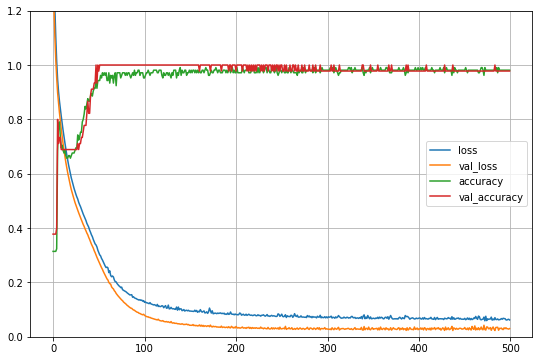

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.ylim(0, 1.2)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()

### Model Evaluate

In [22]:
loss, accuracy = Model_iris.evaluate(X_test, y_test)

print(f'Loss : {loss:.2f}')
print(f'Accuracy : {accuracy:.2f}')

2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - accuracy: 0.9778
Loss : 0.03
Accuracy : 0.98


### Model Predict

- Probability

In [23]:
import numpy as np
np.set_printoptions(suppress=True, precision=5)

Model_iris.predict(X_test)

array([[0.99997, 0.00003, 0.     ],
       [0.99971, 0.00029, 0.     ],
       [0.00298, 0.99702, 0.     ],
       [0.     , 0.00037, 0.99963],
       [0.99999, 0.00001, 0.     ],
       [0.00026, 0.99973, 0.00001],
       [0.     , 0.00521, 0.99479],
       [1.     , 0.     , 0.     ],
       [0.     , 0.00168, 0.99832],
       [0.99995, 0.00005, 0.     ],
       [0.00003, 0.86793, 0.13204],
       [0.     , 0.00324, 0.99676],
       [0.00004, 0.99761, 0.00235],
       [1.     , 0.     , 0.     ],
       [0.99999, 0.00001, 0.     ],
       [0.00007, 0.99728, 0.00265],
       [0.00003, 0.98784, 0.01213],
       [0.99998, 0.00002, 0.     ],
       [0.00004, 0.99981, 0.00015],
       [1.     , 0.     , 0.     ],
       [0.99996, 0.00004, 0.     ],
       [0.99996, 0.00004, 0.     ],
       [0.     , 0.0009 , 0.9991 ],
       [0.99998, 0.00002, 0.     ],
       [0.     , 0.03897, 0.96103],
       [0.     , 0.01015, 0.98985],
       [0.99999, 0.00001, 0.     ],
       [0.00002, 0.99884, 0.

- Class

In [24]:
y_hat = Model_iris.predict_classes(X_test)

y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- One-Hot Encoding to Array

In [30]:
y = np.argmax(y_test, axis=1)

y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [33]:
print(classification_report(y, y_hat,
                            target_names=['setosa', 'virginica', 'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Model Save & Load

In [34]:
!ls -l

total 36
-rw-r--r-- 1 root root 29384 Aug  4 08:21 model.png
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


### Save to File System

In [35]:
Model_iris.save('Model_iris.h5')

!ls -l

total 72
-rw-r--r-- 1 root root 34600 Aug  4 08:36 Model_iris.h5
-rw-r--r-- 1 root root 29384 Aug  4 08:21 model.png
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


### Download Colab File

In [ ]:
# from google.colab import files

# files.download('Model_iris.h5')

### Save to Google Drive

In [36]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets'

total 3850167
-rw------- 1 root root   31374019 Mar 31 15:04 Camel.zip
-rw------- 1 root root      20066 Mar 31 15:04 cat.1700.jpg
-rw------- 1 root root   69155672 Mar 31 15:04 creditCardFraud.zip
-rw------- 1 root root   82003032 Mar 31 15:05 DataSet.pkl
-rw------- 1 root root   90618980 Mar 31 15:05 dogs_and_cats_small.zip
-rw------- 1 root root   54561944 Mar 31 15:06 Face.zip
-rw------- 1 root root  862182613 Mar 31 15:10 GloVe.zip
-rw------- 1 root root  149574867 Jul 18 08:17 horse-or-human.zip
-rw------- 1 root root 1245927936 Mar 31 15:20 imagenetV2.zip
-rw------- 1 root root    8204887 Mar 31 15:06 Images_500.zip
-rw------- 1 root root   60711700 Mar 31 15:06 IMDB.zip
-rw------- 1 root root    4240457 Mar 31 15:07 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   80596565 Mar 31 15:08 ko_w2v.zip
-rw------- 1 root root   12929865 Mar 31 15:08 Logo_Data.zip
-rw------- 1 root root   18272469 Mar 31 15:09 MNIST.csv
-rw------- 1 root root    7903524 Mar 31 15:09 naverRatin

In [39]:
Model_iris.save('/content/drive/MyDrive/Colab Notebooks/models/001_Model_iris.h5')

In [40]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34600 Aug  4 08:40 001_Model_iris.h5


### Load Model from Google Drive

In [41]:
from keras.models import load_model

Model_google = load_model('/content/drive/MyDrive/Colab Notebooks/models/001_Model_iris.h5')

In [42]:
Model_google.predict_classes(X_test)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])